<a href="https://colab.research.google.com/github/edefang/Housing-development-/blob/main/Public_Housing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Public Housing Developments – Exploratory Data Analysis

This notebook walks through the analysis in four clear steps:
1. Setup and data loading  
2. Data cleaning  
3. Summary statistics  
4. Visual analysis


In [1]:
# 1. Setup and Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


## Load the dataset
Upload the CSV file to Colab or place it in your Google Drive.

In [2]:
df = pd.read_csv("Public_Housing_Developments_5350258002241432850.csv")
print(f"Data loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")


Data loaded successfully: 6297 rows, 140 columns


## 2. Data Cleaning

In [3]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Remove duplicate rows
df = df.drop_duplicates()

# Drop columns with more than 50% missing values
missing_pct = df.isnull().mean()
df = df.drop(columns=missing_pct[missing_pct > 0.5].index)

# Replace error codes
error_cols = ["rent_per_month", "hh_income", "spending_per_month"]

for col in error_cols:
    if col in df.columns:
        df[col] = df[col].replace(-4, np.nan)

# Fill missing values
num_cols = df.select_dtypes(include="number").columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

print("Data cleaning complete.")


Data cleaning complete.


## 3. Summary Statistics

In [4]:
stats_cols = ["total_units", "pct_occupied", "hh_income", "rent_per_month"]
existing_cols = [c for c in stats_cols if c in df.columns]

df[existing_cols].describe()


,total_units,pct_occupied,hh_income,rent_per_month
count,6297.000000,6297.000000,6297.000000,6297.000000
mean,148.190885,89.495026,19257.797046,409.520724
std,205.734829,20.007887,6847.213764,147.928047
min,1.000000,0.000000,1946.000000,63.000000
25%,50.000000,90.660000,15342.000000,332.000000
50%,100.000000,96.000000,18254.000000,383.000000
75%,175.000000,98.700000,22116.000000,455.000000
max,2391.000000,100.000000,74539.000000,1539.000000


## 4. Visual Analysis

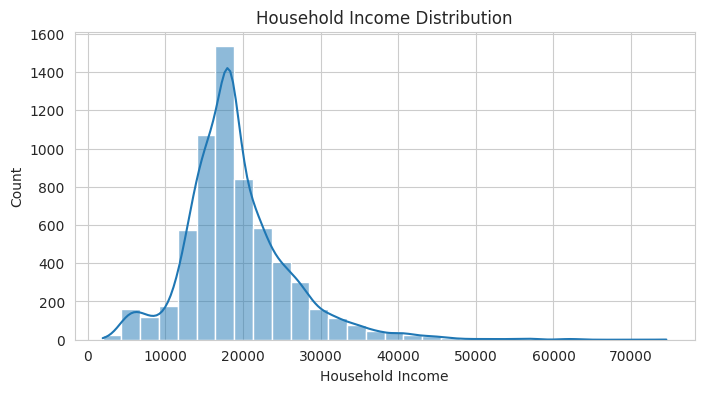

In [5]:
# Income distribution
plt.figure(figsize=(8,4))
sns.histplot(df["hh_income"], bins=30, kde=True)
plt.title("Household Income Distribution")
plt.xlabel("Household Income")
plt.ylabel("Count")
plt.show()


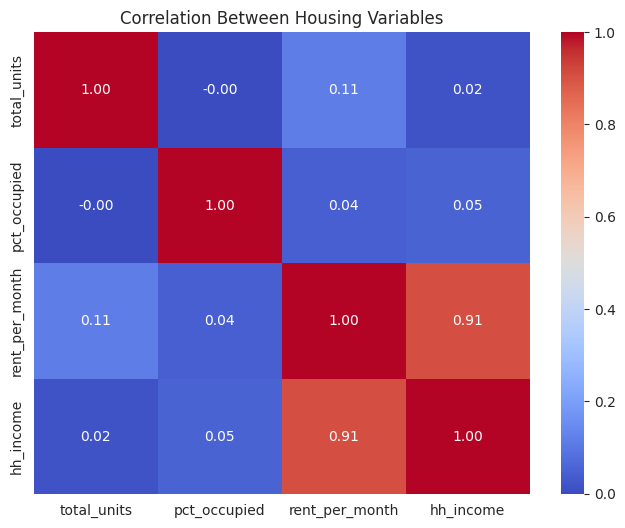

In [6]:
# Correlation heatmap
corr_vars = ["total_units", "pct_occupied", "rent_per_month", "hh_income"]
corr_vars = [c for c in corr_vars if c in df.columns]

plt.figure(figsize=(8,6))
sns.heatmap(df[corr_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Housing Variables")
plt.show()


## Analyze Income vs. Rent Relationship




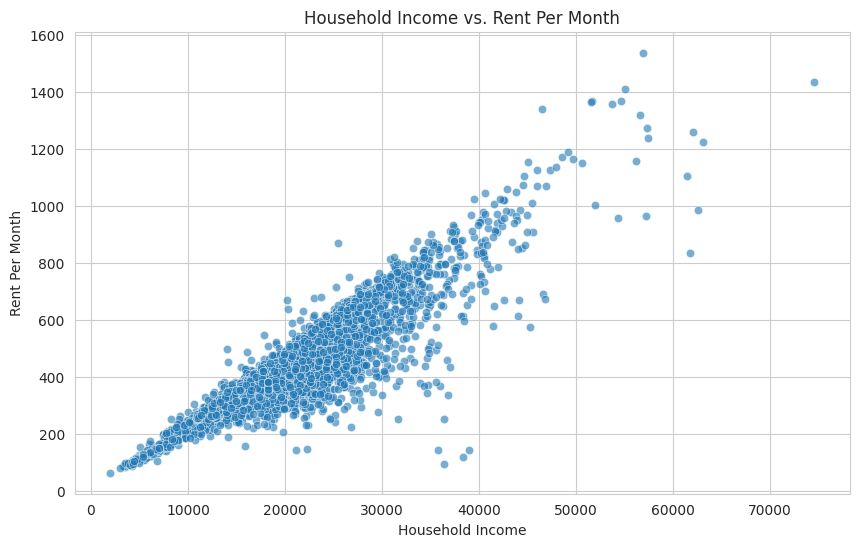

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hh_income', y='rent_per_month', alpha=0.6)
plt.title('Household Income vs. Rent Per Month')
plt.xlabel('Household Income')
plt.ylabel('Rent Per Month')
plt.show()

## Summary:

### Data Analysis Key Findings
*   A scatter plot was successfully generated to visualize the relationship between 'hh\_income' and 'rent\_per\_month', displaying 'Household Income' on the x-axis and 'Rent Per Month' on the y-axis. This plot serves as a tool to identify potential correlations or patterns between these two variables.

### Insights or Next Steps
*   The generated scatter plot needs to be interpreted to identify specific correlations or patterns between 'hh\_income' and 'rent\_per\_month'. This visual analysis will provide insights into how household income may influence rental costs, thereby complementing existing analyses of housing affordability or market trends.
